<a href="https://colab.research.google.com/github/Rogerio-mack/Visualizacao-de-Dados-em-Python/blob/main/c0_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**
<hr>

Existem ao menos dois tipos de visualização de dados. Uma primeira é voltada para **análise e exploração dos dados** para que você faça descobertas como padrões, relações e processos em ação sobre os dados, e é uma forma importante de análise dos dados. O outro tipo de visualização tem por objetivo **comunicar resultados**. Ela fornece informações claras e visualmente atraentes de seus resultados, para serem apresentados ou incluídos em uma publicação. Ambos os tipos de visualização podem ser feitos com `Python`, assim como em outras linguagens e ferramentas, e nosso foco aqui é de empregar a visualização para análise e exploração dos dados.



## Importância da Visualização de Dados




O Quarteto de Anscombe (F.J. Anscombe, 1973) é um exemplo conhecido que ilustra o valor da visualização na análise e entendimento dos dados mesmo quando várias informações, como variáveis estatísticas dos dados, podem ser obtidas. Ele é formado de quatro conjuntos de dados que aparentam ser idênticos quando descritos por técnicas de estatística descritiva como a média e a variância, mas que são muito distintos quando exibidos graficamente. 

Os quatro conjuntos de dados abaixo apresentam com até 3 casas decimais as mesmas médias e variâncias o que leva todos a um mesmo modelo de regressão linear:

$$ y = 3 + 0.5 x$$

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

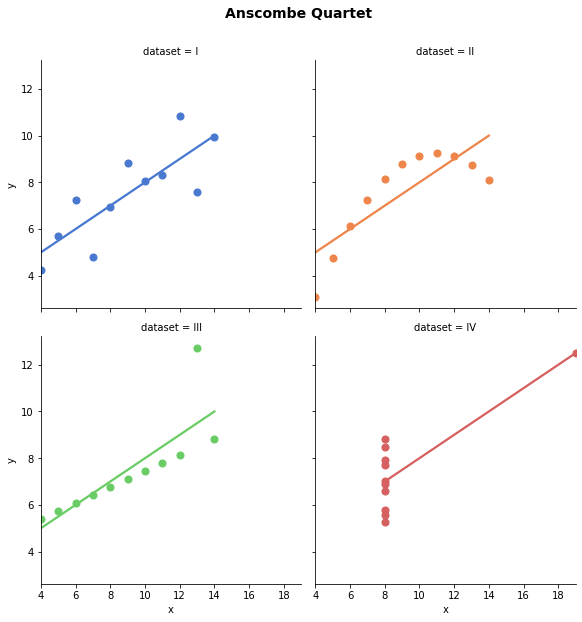

In [3]:
# Load Anscombe's quartet
df = sns.load_dataset("anscombe")

# Mostra os resultados de um modelo de regressão linear
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.suptitle('Anscombe Quartet', fontsize=14, weight='bold', y=1.05)
plt.show()

Não se preocupe com o código agora, você vai aprender mais sobre ele adiante. O importante aqui é você entender que um exemplo bastante simples de dados já demonstra padrões e relações dos dados podem ser difíceis de ser observadas sem o auxílio da visualização de dados. 

Exemplos mais elaborados podem ser facilmente obtidos.  

               model   mpg  cyl   disp   hp  ...   qsec  vs  am  gear  carb
0          Mazda RX4  21.0    6  160.0  110  ...  16.46   0   1     4     4
1      Mazda RX4 Wag  21.0    6  160.0  110  ...  17.02   0   1     4     4
2         Datsun 710  22.8    4  108.0   93  ...  18.61   1   1     4     1
3     Hornet 4 Drive  21.4    6  258.0  110  ...  19.44   1   0     3     1
4  Hornet Sportabout  18.7    8  360.0  175  ...  17.02   0   0     3     2

[5 rows x 12 columns]


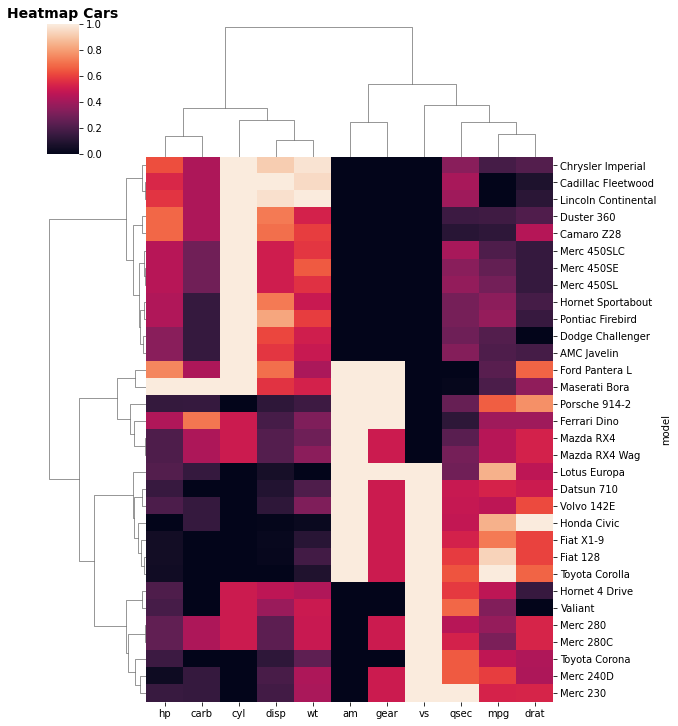

In [ ]:
import pandas as pd
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/mtcars.csv')
print(df.head())
 
sns.clustermap(df.set_index('model'), metric="euclidean", standard_scale=1, method="ward", figsize=(9,10))
plt.title('Heatmap Cars', fontsize=14, weight='bold')
plt.show()


O gráfico acima exibe um *Mapa de Calor* (*Heat Map*) e representa, por diferentes cores, os valores associados a cada atributo dos veículos. Permite assim observarmos padrões e relações sobre os dados que dificilmente poderíamos observar de outro modo. Eles possibilitam até mesmo identificar grupos de veículos que compartilham características e, mesmo um leigo, pode facilmente compreender essas informações. 

A visualização de dados pode contribuir para a compreensão de dados bastante complexos e bastante distantes de dados numéricos, estruturados em tabelas que você talvez esteja habituado. Gráficos, como uma *WordCloud* abaixo, apresentam  os termos mais frequentes de um documento e fornecem uma visão sumária de seu conteúdo, mesmo para textos que contém milhares de palavras e tem uma série de aplicações práticas como identificar as principais reclamações em vários emails de clientes ou as notícias mais comentadas do dia no Twitter. 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




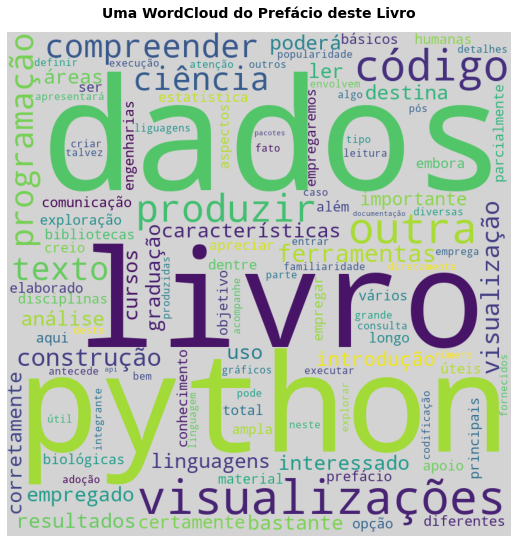

In [5]:
import urllib.request  
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

texto = []
for line in urllib.request.urlopen('http://meusite.mackenzie.br/rogerio/MyBook/intro.md'): 
    texto.append(line.decode('utf-8'))

stopwords = set( stopwords.words('portuguese'))

texto_string = ''
for line in texto: 
  texto_string = texto_string + ' ' + line.lower()  

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='lightgrey',
				stopwords = stopwords,
				min_font_size = 10).generate(texto_string)

print('\n')
plt.figure(figsize = (7, 7), facecolor = None)
plt.suptitle('Uma WordCloud do Prefácio deste Livro', fontsize=14, weight='bold', y=1.05)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


Esses poucos exemplos já permitem entender o importante papel que a  visualização pode ter na compreensão e analise de grandes conjuntos de dados e, ao longo desse texto poderá acompanhar uma série de análises semelhantes a essas.

## Fazendo Perguntas Relevantes sobre os Dados 

Compreender e analisar dados é buscar respostas para hipóteses que fazemos sobre os dados. Que tipo de perguntas podemos, então, fazer sobre os dados que que gráficos podem nos ajudar a responder essas perguntas? Boa parte deste livro se dedica entender que gráficos devemos empregar para obter as respostas em cada caso. 

Podemos agrupar as perguntas sobre os dados em diferentes categorias e para cada uma delas identificar os gráficos que em geral são mais adequados para explorar essas questões:

> **Evolução** (ou *Tendência dos Dados*): gráficos de linha e de áreas, séries múltiplas

> **Distribuição**: histogramas, gráficos densidade de probabilidade, gráficos de caixa

> **Quantidades e Proporções**: gráficos de barras e pizza, mapas de árvore

> **Relações**: gráficos de dispersão, correlogramas e mapas de calor

Outras categorias podem ser adotadas, existem muitos outros tipos de gráficos e mesmo um único gráfico pode explorar mais que um aspecto dos dados. Mas essas categorias parecem ser suficientes para os nossos propósitos e veremos as principais alternativas de gráficos para compreender cada um desses aspectos dos dados.  

Mas antes de nos aprofundarmos alguns exemplos podem deixar mais claro a você que tipo de pergunta estamos interessados em cada uma dessas categorias. Você explorar os códigos aqui se quiser, mas não precisa se preocupar com eles neste momento. Eles estão aqui apenas produzir as figuras para você e os recursos empregados serão discutidos ao longo do texto. 


## Evolução

Muitas vezes estamos interessados na evolução dos valores de uma variável com relação ao tempo ou ainda uma outra variável. Nesses casos, frequentemente queremos saber sobre a tendência dessa evolução, sobre a probabilidade de se alcançar um valor ou ainda comparar a evolução de variáveis que esperamos tenham alguma relação. 

Quando essas variáveis são numéricas um gráfico de linhas é frequentemente usado para visualizar a tendência nos dados e responder a essas perguntas, e chamamos de séries temporais quando uma dessas variáveis representa o tempo. 

A visualização, nesses casos, permite *entendermos* como uma variável evolui com relação a outra e podemos, por exemplo, identificar tendências de longo prazo e flutuações da moeda americana exibindo essa evolução. 



In [ ]:
# Obtendo os dados
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/mystocksn.csv')
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce') 
bovespa.head()

,data,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,102984.0,9.92,12.08,4.4491
1,2020-02-28,104172.0,9.82,12.10,4.4848
2,2020-03-02,106625.0,10.27,12.49,4.4413
3,2020-03-03,105537.0,10.22,12.16,4.4724
4,2020-03-04,107224.0,10.56,12.33,4.5132


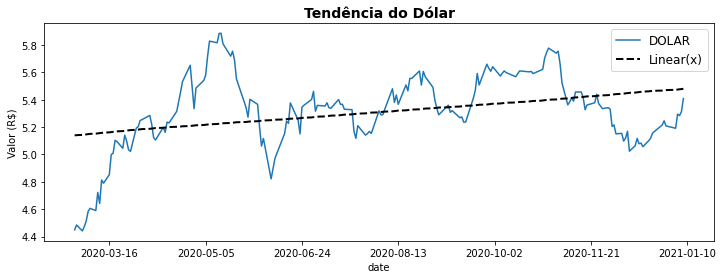

In [ ]:
import matplotlib.ticker as ticker
import numpy as np
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.set_title('Tendência do Dólar', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")
ax.legend(fontsize=12)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

## Distribuição  

Os dados a seguir foram obtidos da *WHO World Health Organization* - Life expectancy and Healthy life expectancy. Eles apresentam diversos indicadores de saúde e dados de desenvolvimento dos países. Uma pergunta relevante que você poderia fazer é sobre como estão distribuídos os valores Produto interno bruto dos países ou ainda a Expectativa de Vida média dos indivíduos entre os diferentes países Desenvolvidos e em Desenvolvimento. 

Claramente esses dados apresentam distribuições bastante diferentes e se você conhece um pouco sobre técnicas de estatística e probabilidades, sabe que identificar a forma dessas distribuições tem um série de implicações para problemas de inferência (estimativa de valores) e são um instrumento importante para entender conjuntos de dados.




In [ ]:
# Obtendo os dados
WHO = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


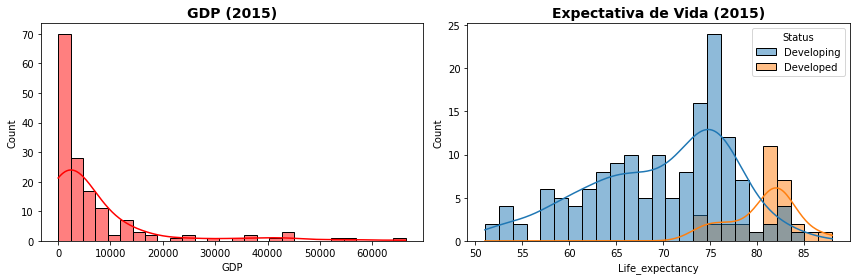

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=WHO, x='GDP', kde=True, color="red", ax=axs[0])
axs[0].set_title('GDP (2015)', fontsize=14, weight='bold') 

sns.histplot(x='Life_expectancy', data=WHO, hue='Status', kde=True, ax=axs[1], bins=25)
axs[1].set_title('Expectativa de Vida (2015)', fontsize=14, weight='bold') 

plt.tight_layout()
plt.show()

## Quantidades e Proporções 

Muitas vezes vamos estar interessados na evolução dos dados ou na sua distribuição, mas queremos acessar os valores diretamente em suas unidades, exibindo esses valores para diferentes classes, ou suas proporções (razão entre valores), e poder comparar diferentes conjuntos de dados. 

Para isso os gráficos de barras e suas diversas variantes são normalmente empregados. Eles permitem exibir essas quantidades separadas por diferentes categorias ou classes. 

In [ ]:
# Obtendo os dados
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


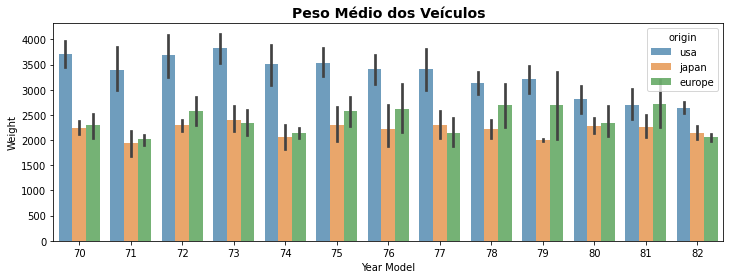

In [ ]:
from matplotlib import cm
fig = plt.figure(figsize=(12,4))

sns.barplot(x='model_year', y='weight', data=cars, hue='origin', alpha=0.7)

plt.title('Peso Médio dos Veículos',fontsize=14,weight='bold')
plt.xlabel('Year Model')
plt.ylabel('Weight')

plt.show()


O gráfico acima, por exemplo, permite observar o peso médio dos veículos produzidos nos USA, Japão e Europa ao longo dos anos e linha sobre as barras indica o intervalo de confiança (95%) dos dados.

## Relações 

Por último, podemos estar interessados em analisar relações entre os dados e, muitas vezes, essa é parte mais importante dentre as descobertas que buscamos nos dados. Muitas vezes essas relações são denominadas de modo bastante geral como correlações. Mas é importante notar que a correlação estatística é um termo com significado bem específico e está associada unicamente a uma relação *linear* entre os dados. Assim, preferimos empregar aqui o termo relações. Embora relações lineares (correlações) estejam entrea as relações mais comuns que buscamos nos dados a visualização dos dados permite encontrarmos muitos outros padrões. 

Os dados abaixo, extraídos de https://www.gapminder.org, uma organização para o desenvolvimento sustentável global, permitem exibirmos as relações entre renda, expectativa de vida e o índice de percepção de corrupção (CPI Corruption Perceptions Index) dos diferentes países e até mesmo traçar uma linha de tendência.


In [ ]:
# Obtendo os dados
gap = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/gapminder_2015.csv')
gap['cod_continent'] = df[['continent']].astype('category').apply(lambda x: x.cat.codes)
gap.head()

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index,LifeExpect,HappyIdx,SchoolYears15_24,VacineBelieve,ChildMortality,Co2Emissions,CPI,Population,cod_continent
0,Africa,Botswana,2015,78.7,15700,32.1,24.7,60.5,66.9,0.376,8.40,NaN,40.7,2.560,63.0,2120000,0
1,Africa,Burkina Faso,2015,47.0,1600,24.3,15.1,35.5,60.7,0.442,3.76,NaN,86.8,0.182,38.0,18100000,0
2,Africa,Cote d'Ivoire,2015,33.1,3230,20.1,15.4,41.6,61.0,0.445,6.59,NaN,90.0,0.405,32.0,23200000,0
3,Africa,Egypt,2015,31.8,10200,14.3,12.5,31.2,70.2,0.476,10.60,NaN,23.6,2.370,36.0,92400000,0
4,Africa,Kenya,2015,53.3,2800,21.5,16.3,41.5,64.7,0.436,9.06,NaN,46.3,0.341,25.0,47900000,0


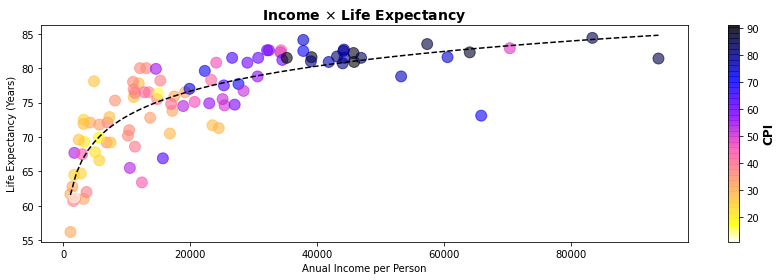

In [ ]:
plt.figure(figsize=(12, 4))

plt.scatter(df['income_per_person'],df['LifeExpect'], alpha=0.6, s=120, c=df['CPI'], cmap=cm.gnuplot2_r)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('CPI', fontsize=12, weight='bold')

# Produzindo o ajuste da curva
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.log(x) + b

coefs, covar = curve_fit(func, df['income_per_person'], df['LifeExpect'])

x = np.linspace(df['income_per_person'].min(), df['income_per_person'].max(), 100)
y = func(x,*coefs)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.tight_layout()
plt.show()

Cada uma das categorias de análise que você viu aqui serão tratadas em detalhe 
nos capítulos seguintes. Mas é claro que essas categorias e os gráficos que vamos apresentar nesta introdução à visualização de dados não esgotam o assunto. Existem muitas outras análises e gráficos especializados que não cobriremos aqui e, para alguns, você poderá encontrar material complementar no site de códigos deste livro.  

## Pensamento Analítico

O domínio de linguagens e ferramentas como o `Python` para produzir  visualizações são um aspecto importante para que você obtenha resultados corretos na Visualização de Dados. Mas tão importante quanto esse domínio técnico da produção de visualizações dos dados é o seu *pensamento analítico* sobre os dados que permite, a você, compreender que tipo de perguntas você está buscando responder sobre os dados. Sem isso, produzir visualizações dos dados não passaria de exercício gráfico e qualquer caminho parece ser bom quando não se tem ideia onde se quer chegar. 

Compreendido nesse *pensamento analítico* estão os princípios científicos em que lançamos hipóteses iniciais sobre os dados e, a cada análise, criamos novas hipóteses em um processo de refinamento sucessivo o que é essencial para direcionar a visualização de dados exploratória. 




